In [1]:
import cv2
import pandas as pd
import numpy as np
import os
import io
import tensorflow as tf

from PIL import Image
from object_detection.utils import dataset_util
from collections import namedtuple, OrderedDict

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [2]:
# current images path 
img_source_path = 'C:\\Users\\alex\\Downloads\\imgs\\'
img_path = 'data/images/labeled/'
# cropped parts destination
img_dest_path = 'D:\\nn-grocery-shelves\\data\\images\\labeled\\'
cropped_path = 'data/images/detector/'
# Step 1 results path
data_path = 'data/'
# output destination
detector_data_path = 'pack_detector/data/'


In [5]:
images = pd.read_csv(f'{data_path}geentree_labels.csv')

In [6]:
images.head()

,filename,width,height,classname,xmin,ymin,xmax,ymax
0,0003bd09d0f89867eeb05a17c9b94a7c.jpg,344,384,camera,43,92,113,163
1,0003bd09d0f89867eeb05a17c9b94a7c.jpg,344,384,chair,124,246,181,307
2,0003bd09d0f89867eeb05a17c9b94a7c.jpg,344,384,chair,88,350,111,377
3,0003bd09d0f89867eeb05a17c9b94a7c.jpg,344,384,swimming_ring,61,350,85,377
4,0003bd09d0f89867eeb05a17c9b94a7c.jpg,344,384,swimming_ring,12,210,61,266


In [7]:
imgs = list(set(images['filename'].values))

In [58]:
for f in imgs:
    os.system(f'copy {img_source_path}{f} {img_dest_path}')

copy C:\Users\alex\Downloads\imgs\2c3dd92871dc8ad6a760baa69de92276.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\3dbacc1391759a1a16b41831c11ec2db.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\1edc45d72d4b0126cf979e0902b694a5.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\914b2f156b2d6399fa723710b3101bd5.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\0e5b97a580054d9f4bedf9ce576a4eb1.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\3ffa7bc44d5fd5b590ae987bb0fc0913.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\3a98580e32f12a6b2fe9f54678e70d05.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\3e96eb563c78277016e0ad5b8e14729c.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\2ad619a366bdf6d532be40362f5bf79c.jpg D:\nn-grocery-she

copy C:\Users\alex\Downloads\imgs\0a4ee9841201684414db23c51f8a5304.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\3777dee8882f21fb39193b700eeaf45f.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\3418c3494126afdb34b0e2e1bd0b0e43.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\3b17ad920b953c2fae02ee67b15c3d08.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\2c270f66a55e1323abcb165a46476d46.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\3e571e21df64cfb81b4c9a179cfc7082.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\2487de9eb0c848381f80095bbeb0c27e.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\04b102e9b94bac83712f49f8a721769c.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\2e4c5438b3b985c90910842f1af457cb.jpg D:\nn-grocery-she

copy C:\Users\alex\Downloads\imgs\02a068db0387d78ee3abaf1d3eec879c.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\3c1d1349ad8daa55524ac69e1de35b39.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\1f8db7cb1481a8562f7f389b69848ba5.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\2c804dd7e064145f6df3e1aa97e31038.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\0bfab8c05305c4aeb7b20b654b439811.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\3042c8bc3838ad5f259a737c4704cb83.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\2abebab58a29f89f28613279c080b4d4.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\1e6758c067f46e71e68721990506597b.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\03abedad9d70cb0bccbe62a975e37382.jpg D:\nn-grocery-she

copy C:\Users\alex\Downloads\imgs\0ee27e62b21d447951311f0741bb6427.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\3130b7d47a3c91a7cfa4c92619617cbb.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\902fd168276b2471fb15d01fd820e967.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\0983d7f21120c8a29919c608cb0d5649.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\0e763508ab2ed52b18d6929d59f3f71d.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\2e45a5a2267959383936c044ebdc1e20.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\0a1d5ba632735b4363b37fdf59b41287.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\2ef5ac73a54761d0b416c0122792fe32.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\2eee900b2f8e478070c1fd9dd7748cbb.jpg D:\nn-grocery-she

copy C:\Users\alex\Downloads\imgs\2e9e602c007e3b4e2ba205c78e490755.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\3faf3722c8db662237c7487f4459ffb6.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\4a1233551b50570766d1f748838f9b3f.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\2729e41d4078efc60bd35912a005eff9.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\3538adfd2cb20dd665abeb0b5bb4446a.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\1fd6fd1d51e35f239b641493a2803b90.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\ff0dca7a06ddd9d69cdc5e2ec9857921.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\1855eb8c89f7037597334daa2da6e6b0.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\feb06d22941131430c7abc002e3eb3d6.jpg D:\nn-grocery-she

copy C:\Users\alex\Downloads\imgs\5dd54e7162ef7d963f2fbf0f2ed647a1.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\0d9d7c0782ddf538a4cfc549e6c2a772.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\1827e082e93bed06a900e56ddf9703ee.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\2645ed2425eb8cfcd65e6f8cb0bc25e7.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\3055ce340d75ac26c6052332ac79d7b0.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\2a2614fab1195737d8638e8b10a42e3b.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\3ff1a1b4b00457142a2bd1b972fe7048.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\0a30417573226177db5fde0ac41ee13e.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\3023a8a139db30e11f41a44df8bd02b6.jpg D:\nn-grocery-she

copy C:\Users\alex\Downloads\imgs\3f821704fa1fc10f46819e047c00a7a8.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\3f92ebdbd776237d93339b0e45068052.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\ffe4794a4ad1d1b500716525866933fc.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\3b4d0750898c4bc18ab5ada4a7b52c4a.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\0ce920fdc4b6d713d610dbf34092bb47.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\3df8ed033aca775ada26a50468a474a7.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\5ddefd0b661d22908d4b74f8cfcf38c0.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\964f122dd324f0ae24e09137f9442a7d.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\4d0fba0509c38d6fd868df7950e68c62.jpg D:\nn-grocery-she

copy C:\Users\alex\Downloads\imgs\5dd23d66534272ad0da6a80cbe8089b1.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\904fe6925aa02739d2cc02f0af77311b.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\4227d4975830e459ec8ae71c0b197f6f.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\3303e09203899b33de745a116cd5f076.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\3b8cac2ac1f223528a3717e110f8262b.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\0f6db74f5b09ae12361859c5ac160abe.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\2b31872aa1c771784321af8804dbf16d.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\889c79d376d8f66e778b349cbc987651.jpg D:\nn-grocery-shelves\data\images\labeled\
copy C:\Users\alex\Downloads\imgs\887e1af7b3d8f63d0dff4d94b9012a33.jpg D:\nn-grocery-she

In [244]:
images = pd.read_csv(f'{data_path}geentree_labels.csv')

In [10]:
images['classname'] = images.classname.apply(class_text_to_int)

In [245]:
imgs_train, imgs_validation, _, _ = train_test_split(
    imgs, imgs, test_size=0.3, random_state=6)

In [246]:
images_df = images

In [247]:
shelves = list(set(images_df['filename'].values))

In [248]:
def is_train(filename): return filename in imgs_train
images_df['is_train'] = images_df.filename.apply(is_train)

In [249]:
images_df.head(5)

,filename,width,height,classname,xmin,ymin,xmax,ymax,is_train
0,0003bd09d0f89867eeb05a17c9b94a7c.jpg,344,384,camera,43,92,113,163,True
1,0003bd09d0f89867eeb05a17c9b94a7c.jpg,344,384,chair,124,246,181,307,True
2,0003bd09d0f89867eeb05a17c9b94a7c.jpg,344,384,chair,88,350,111,377,True
3,0003bd09d0f89867eeb05a17c9b94a7c.jpg,344,384,swimming_ring,61,350,85,377,True
4,0003bd09d0f89867eeb05a17c9b94a7c.jpg,344,384,swimming_ring,12,210,61,266,True


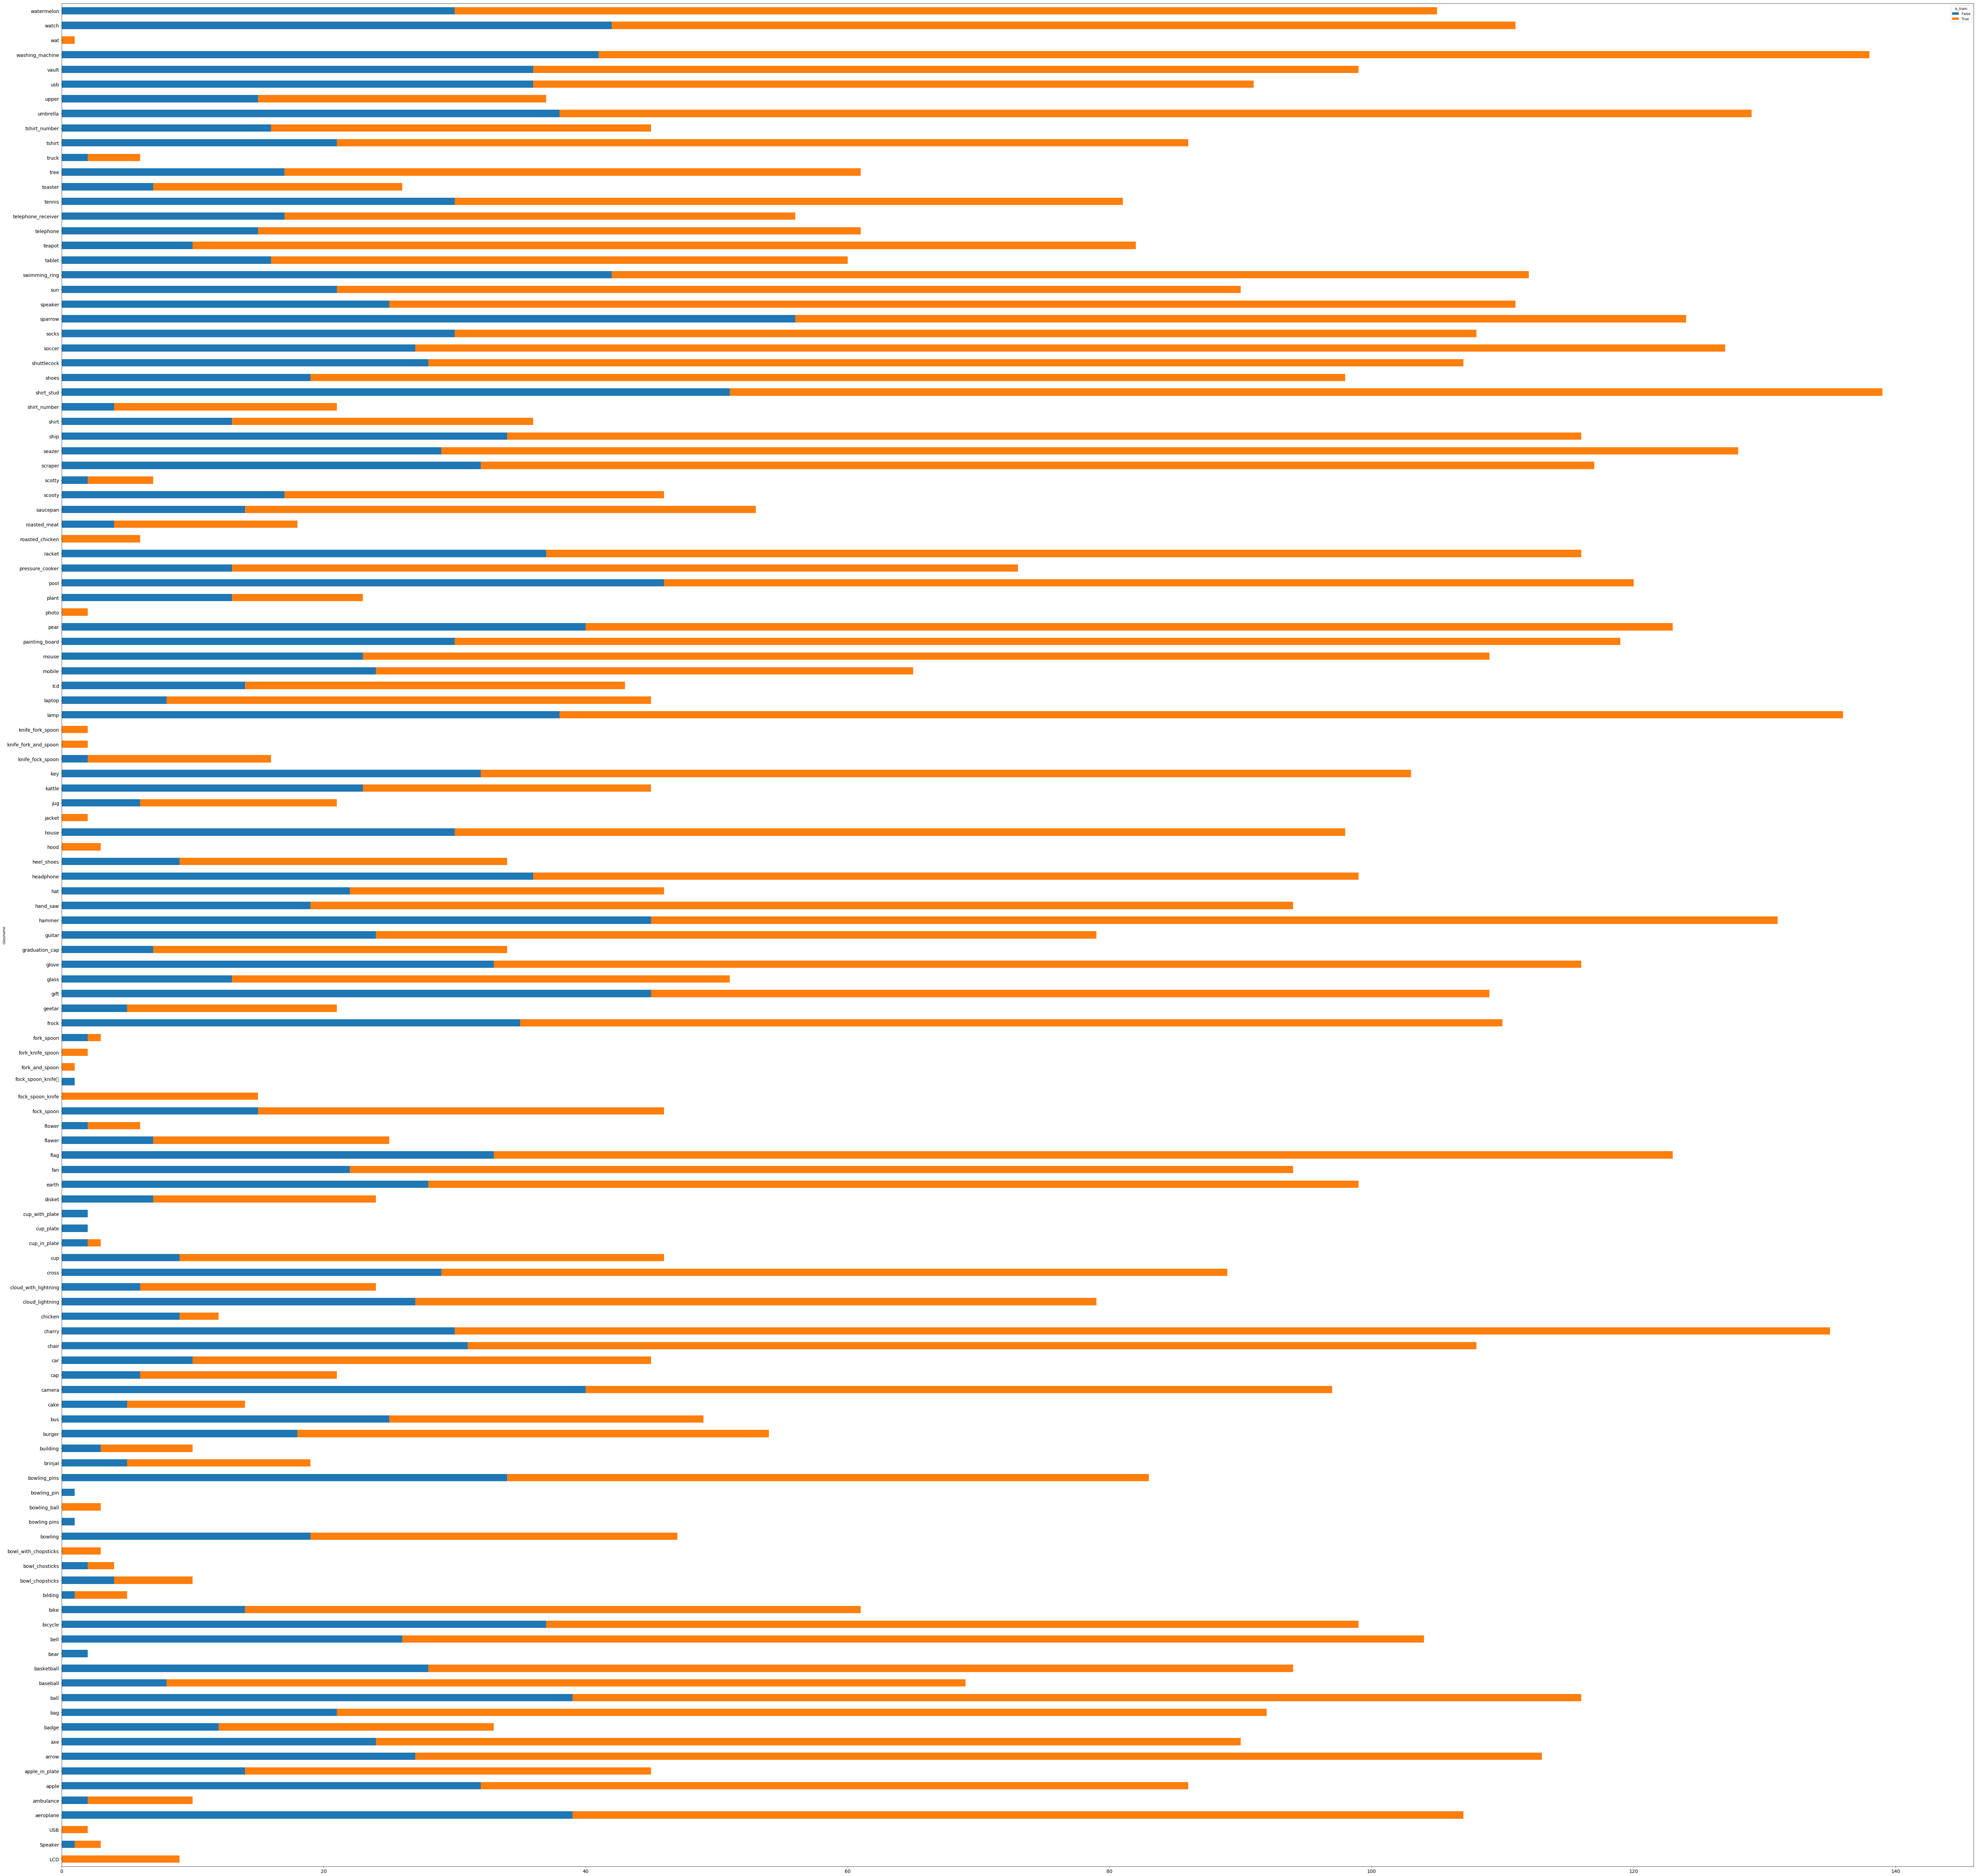

In [250]:
df = images_df[images_df.classname != 0].\
         groupby(['classname', 'is_train'])['classname'].\
         count().unstack('is_train').fillna(0)
df.plot(kind='barh', stacked=True, figsize=(100,100), fontsize=14)

In [252]:
# save to pkl
images_df.to_pickle(f'{data_path}images.pkl')


In [133]:
# function to display shelf photo with rectangled products
def draw_shelf_photo(file):
    file_products_df = images_df[images_df.filename == file]
    coordinates = file_products_df[['xmin', 'ymin', 'xmax', 'ymax']].values
    im = cv2.imread(f'{img_dest_path}{file}')
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)    
    for xmin, ymin, xmax, ymax in coordinates:
        cv2.rectangle(im, (xmin, ymin), (xmax, ymax), (0, 255, 0), 5)
    plt.imshow(im)

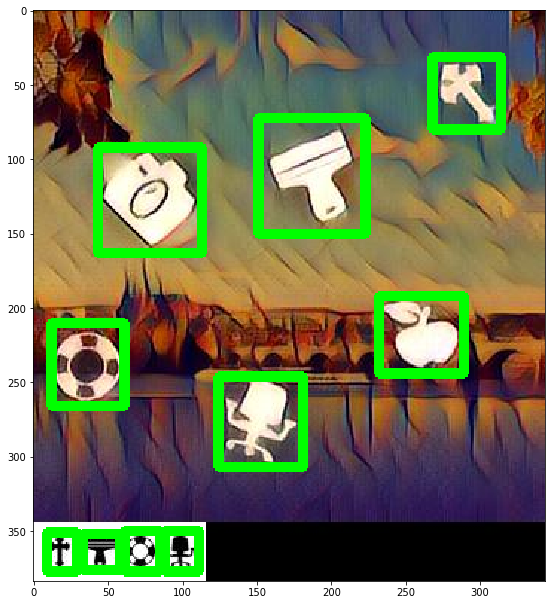

In [134]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
draw_shelf_photo('0003bd09d0f89867eeb05a17c9b94a7c.jpg')

In [227]:
SHAPE_WIDTH = 80
SHAPE_HEIGHT = 80

In [228]:
# resize pack to fixed size SHAPE_WIDTH x SHAPE_HEIGHT
def resize_pack(pack):
    fx_ratio = SHAPE_WIDTH / pack.shape[1]
    fy_ratio = SHAPE_HEIGHT / pack.shape[0]  
    pack = cv2.resize(pack, (0, 0), fx=fx_ratio, fy=fy_ratio)
    return pack[0:SHAPE_HEIGHT, 0:SHAPE_WIDTH]

In [230]:
# x - image, y - class, f - is_train flag
x, y, f = [], [], []
for file in images_df['filename'].unique():
    photo_rects = images_df[images_df.filename == file]
    rects_data = photo_rects[['classname', 'xmin', 'ymin', 'xmax', 'ymax', 'is_train']]
    im = cv2.imread(f'{img_dest_path}{file}')
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    for classname, xmin, ymin, xmax, ymax, is_train in rects_data.values:
        if classname == 0:
            continue
        pack = resize_pack(np.array(im[ymin:ymax, xmin:xmax]))
        x.append(pack)
        f.append(is_train)
        y.append(classname - 1)
        

In [231]:
len(x)

7569

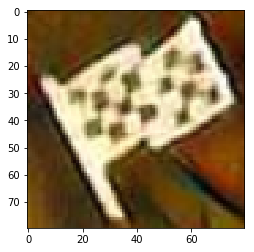

In [232]:
plt.imshow(x[12])

In [233]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

from sklearn.metrics import confusion_matrix
import itertools
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras import backend as K


%matplotlib inline

In [234]:
num_classes = 107

In [235]:
# let's split the data to train/validation sets based on our is_train flag
x = np.array(x)
y = np.array(y)
f = np.array(f)
x_train, x_validation, y_train, y_validation = x[f], x[~f], y[f], y[~f]
# save validation images
x_validation_images = x_validation

In [237]:
# convert y_train and y_validation to one-hot arrays
y_train = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_validation, num_classes)

In [238]:
x_train = x_train.astype('float32')
x_validation = x_validation.astype('float32')
x_train /= 255
x_validation /= 255

In [239]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_validation.shape[0], 'validation samples')

x_train shape: (5296, 80, 80, 3)
y_train shape: (5296, 107)
5296 train samples
2273 validation samples


In [240]:
# let's build our ResNet CNN. We don't do any significant changes to keras example
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 5:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr


def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v1(input_shape, depth, num_classes=10):
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=x_train.shape[1:])
    x = resnet_layer(inputs=inputs)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

n = 3
version = 1
if version == 1:
    depth = n * 6 + 2
elif version == 2:
    depth = n * 9 + 2
model_type = 'ResNet%dv%d' % (depth, version)

model = resnet_v1(input_shape=x_train.shape[1:], depth=depth, num_classes=num_classes)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=lr_schedule(0)), metrics=['accuracy'])

Learning rate:  0.001


In [241]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images
datagen.fit(x_train)

In [242]:
batch_size = 50
epochs = 15
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    validation_data=(x_validation, y_validation),
                    epochs=epochs, verbose=1, workers=4, 
                    callbacks=[LearningRateScheduler(lr_schedule)])

Epoch 1/15
Learning rate:  0.001
 12/106 [==>...........................] - ETA: 34:26 - loss: 5.5936 - acc: 0.0133

KeyboardInterrupt: 